# 0.2.0 Hierarchical Clustering

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sys
sys.path.append("../") 

import utils.paths as path
from utils.paths2 import direcciones

## 0.2.2 Hierarchical clustering: ward method

In [4]:
comic_con = pd.read_csv(path.data_raw_dir("comic_con.csv"), sep=',')
print(comic_con.info())
comic_con.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   x_coordinate  36 non-null     int64  
 1   y_coordinate  36 non-null     int64  
 2   x_scaled      36 non-null     float64
 3   y_scaled      36 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.2 KB
None


,x_coordinate,y_coordinate,x_scaled,y_scaled
0,17,4,0.509,0.090
1,20,6,0.599,0.135
2,35,0,1.049,0.000
3,14,0,0.419,0.000
4,37,4,1.109,0.090


In [5]:
# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], 
                          method='ward', 
                          metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, t=2, criterion='maxclust')

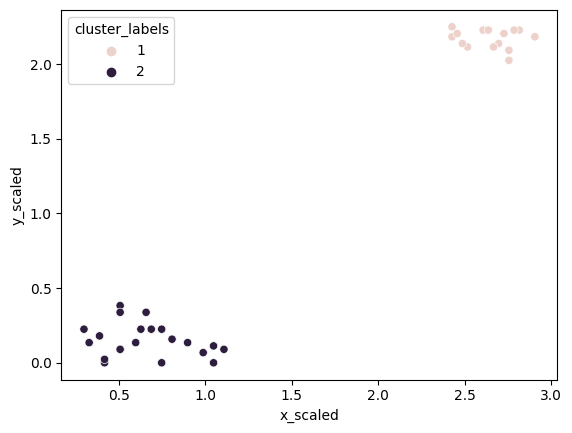

In [6]:
# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data = comic_con)
plt.show()

## 0.2.3 Hierarchical clustering: single method

In [7]:
# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], 
                          method='single', 
                          metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, t=2, criterion='maxclust')

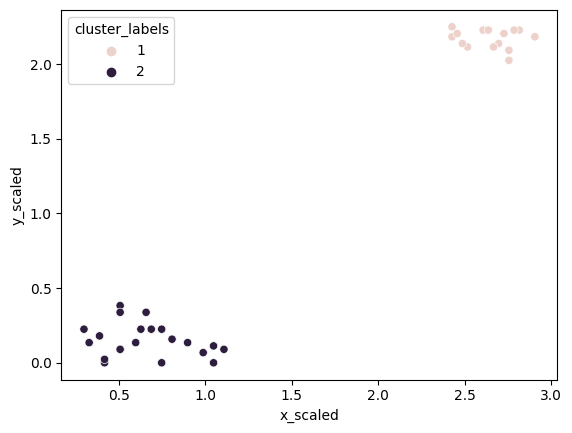

In [8]:
# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

## 0.2.4 Hierarchical clustering: complete method

In [9]:
# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], 
                          method='complete', 
                          metric = 'euclidean')
# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, t=2, criterion='maxclust')

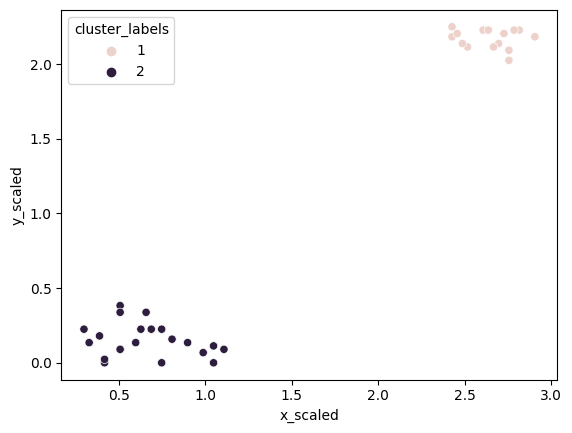

In [10]:
# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data = comic_con)
plt.show()

## 0.2.6 Visualize clusters with matplotlib

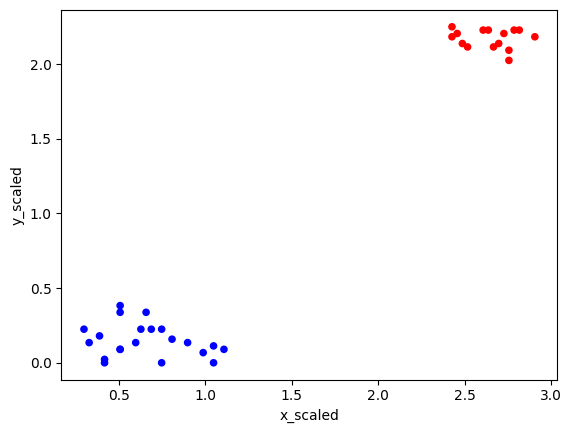

In [11]:
# Define a colors dictionary for clusters
colors = {1:'red', 2:'blue'}

# Plot a scatter plot
comic_con.plot.scatter(x='x_scaled', 
                	   y='y_scaled',
                       c=comic_con['cluster_labels'].apply(lambda x: colors[x]))
plt.show()

## 0.2.7 Visualize clusters with seaborn

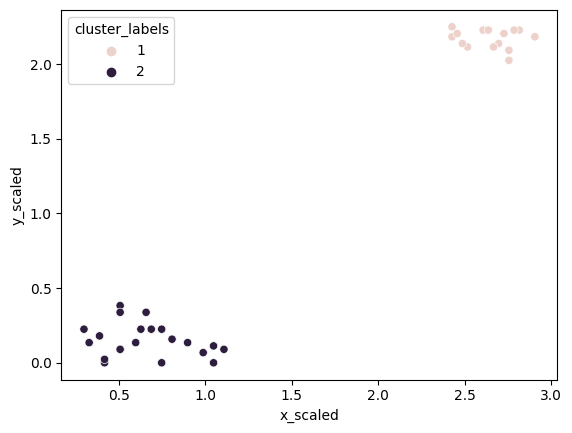

In [12]:
# Plot a scatter plot using seaborn
sns.scatterplot(x='x_scaled',
                y='y_scaled',
                hue='cluster_labels', 
                data = comic_con)
plt.show()

## 0.2.9 Create a dendrogram

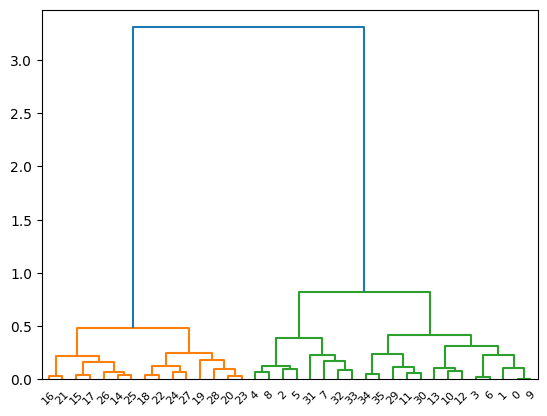

In [15]:
# Create a dendrogram
dn = dendrogram(distance_matrix)

# Display the dendogram
plt.show()

## 0.2.11 Timing run of hierarchical clustering

In [19]:
fifa = pd.read_csv(path.data_raw_dir("fifa.csv"), sep=',')
fifa.head()

,sliding_tackle,aggression,scaled_sliding_tackle,scaled_aggression
0,23,63,0.97,3.72
1,26,48,1.09,2.84
2,33,56,1.39,3.31
3,38,78,1.60,4.61
4,11,29,0.46,1.71


In [20]:
# Fit the data into a hierarchical clustering algorithm
distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 'ward')

In [21]:
# Assign cluster labels to each row of data
fifa['cluster_labels'] = fcluster(distance_matrix, t=3, criterion='maxclust')

In [24]:
# Display cluster centers of each cluster
print(fifa[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby('cluster_labels').mean())

                scaled_sliding_tackle  scaled_aggression
cluster_labels                                          
1                            2.911454           4.307614
2                            0.864640           2.010895
3                            1.153452           3.694109


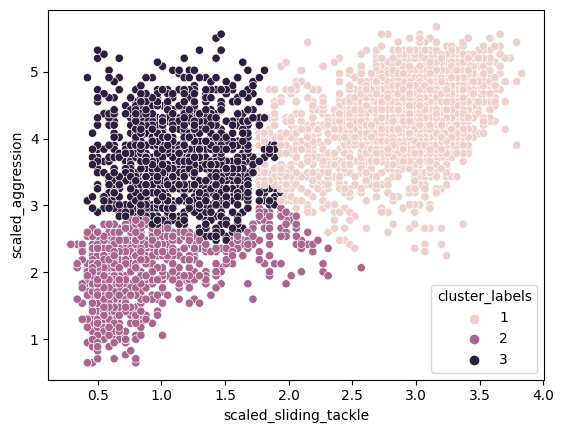

In [25]:
# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_sliding_tackle', y='scaled_aggression', hue='cluster_labels', data=fifa)
plt.show()

In [ ]:
print('ok_')